whole-ct2part-ct,从全基因组中提取部分结构。
输入输出都是ct文件。

In [14]:
import numpy as np
import os
os.chdir("D:/360MoveData/Users/dgwei/Desktop/BASIC/四维数据分析流程/基于SHAPE-MaP数据预测动态结构/PDCOV-sun/")
# strc_ric = np.loadtxt('SARS2-invivo-shape-danny.ct', dtype=[('1','<i4'),('2','<S2'),('3','<i4'),('4','<i4'),('5','<i4'), ('6','<i4')], skiprows=1,delimiter=' ')
strc_ric = np.loadtxt('PDCoV.ct', dtype=[('1','<i4'),('2','<S2'),('3','<i4'),('4','<i4'),('5','<i4'), ('6','<i4')], skiprows=1)
# strc_ric = np.loadtxt('SARS2-invivo-vric-caocc.ct', dtype=[('1','<i4'),('2','<S2'),('3','<i4'),('4','<i4'),('5','<i4'), ('6','<i4')], skiprows=1)

In [15]:
def select_strc(ct_f, s, e, types = 'varna'):
    strc_selet = ct_f[s-1:e].copy()
    mask = (strc_selet['5'] < s) | (strc_selet['5'] >= e)
    strc_selet['5'][mask] = 0
    if types == 'rna_strc':
        strc_selet['1'] = strc_selet['1'] - s
        strc_selet['3'] = strc_selet['3'] - s
        strc_selet['4'] = strc_selet['4'] - s
        strc_selet['5'][strc_selet['5']>0] = strc_selet['5'][strc_selet['5']>0] - s
        strc_selet['6'] = strc_selet['6'] - s
    return strc_selet

In [18]:
s = 11394
e = 11510
ric_1 = select_strc(strc_ric, s, e)
np.savetxt('4.'+str(s)+'-'+str(e)+'.ct', ric_1, fmt = '%s')

In [17]:
with open('5.'+str(s)+'-'+str(e)+'.ct', 'w') as f:
    with open('4.'+str(s)+'-'+str(e)+'.ct','r')as F:
        for l in F:
            a=l.split('\t')[1];b=list(a);c=b[2]
            if a.startswith('b'):
                d=l.replace(a,c)
                f.write(d)

全基因组覆盖度可视化/测序深度可视化

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
#%matplotlib inline可以在Notebook中直接显示图形输出，%load_ext autoreload和%autoreload 2用于自动重新加载模块

In [2]:
import os
os.chdir("D:/360MoveData/Users/dgwei/Desktop/BASIC/bulk_RNAseq/")
from plotly.offline import plot
from IPython.display import IFrame
import pandas as pd
import numpy as np
import shutil#os模块的补充，提供了复制、移动、删除、压缩、解压等操作
from tabulate import tabulate#打印漂亮的表格数据
import matplotlib.pyplot as plt
# 设置全局字体为 "Times New Romance"
plt.rc('font',family='Times New Roman')

In [3]:
#输入基因组颜色文件
orfcolors = pd.read_csv('PEDV-colorcode-rainbow.txt', sep=' ', names=['orf', 'color'], index_col=0)['color'].to_dict()
orfcolors

{'ORF1a': '#c5d9ea',
 'ORF1b': '#e8d2c4',
 'S': '#82c91e',
 'ORF3a': '#3bc9db',
 'E': '#228be6',
 'M': '#9fb1fc',
 'N': '#ffd43b'}

In [5]:
#输入基因组注释
anno = pd.read_csv('reference/PEDV-annotations.gff', sep='\t', names=['chrom', 'type', 'name', 'start', 'end', 'x', 'y', 'z'])
anno

,chrom,type,name,start,end,x,y,z
0,MK584552.1,CDS,E,25446,25676,0.0,.,.
1,MK584552.1,CDS,M,25684,26364,0.0,.,.
2,MK584552.1,CDS,N,26376,27701,0.0,.,.
3,MK584552.1,CDS,ORF3a,24791,25465,0.0,.,.
4,MK584552.1,CDS,S,20634,24791,0.0,.,.


In [6]:
cdsanno = anno[anno['type'] == 'CDS']
#cdsanno = cdsanno.iloc[:10].sort_values(by='start').iloc[:9]
cdsanno = cdsanno.iloc[:10].sort_values(by='start')
#loc：通过行、列的名称或标签来索引
#iloc：通过行、列的索引位置来寻找数据
cdsanno = pd.concat([
    cdsanno,
    pd.DataFrame([
        pd.Series(['MK584552.1', 'CDS', 'ORF1a', 293, 12601, '.', '.', '.'], index=cdsanno.columns),
        pd.Series(['MK584552.1', 'CDS', 'ORF1b', 12601, 20637, '.', '.', '.'], index=cdsanno.columns),
    ])])
cdsanno = cdsanno.sort_values(by='start').iloc[:, 2:5].reset_index(drop=True)
cdsanno['color'] = cdsanno['name'].apply(orfcolors.__getitem__)
cdsanno.to_pickle('./tmp/cdsannotation.pickle')
#cdsanno

In [12]:
viralcoverage1 = pd.read_csv('D:/360MoveData/Users/dgwei/Desktop/BASIC/two-dimensional data analysis/PEDV/incell/coverage-1/PEDV-incell-mod1-1.coverage.txt', sep='\t', names=['chrom', 'pos', 'count'])
viralcoverage2 = pd.read_csv('D:/360MoveData/Users/dgwei/Desktop/BASIC/two-dimensional data analysis/PEDV/incell/coverage-1/PEDV-incell-unmod-1.coverage.txt', sep='\t', names=['chrom', 'pos', 'count'])
viralcoverage3 = pd.read_csv('D:/360MoveData/Users/dgwei/Desktop/BASIC/two-dimensional data analysis/PEDV/incell/coverage-1/PEDV-incell-mod1-2.coverage.txt', sep='\t', names=['chrom', 'pos', 'count'])
viralcoverage4 = pd.read_csv('D:/360MoveData/Users/dgwei/Desktop/BASIC/two-dimensional data analysis/PEDV/incell/coverage-1/PEDV-incell-unmod-2.coverage.txt', sep='\t', names=['chrom', 'pos', 'count'])

In [13]:
merged_mod = pd.concat([viralcoverage1, viralcoverage3]).groupby(['chrom', 'pos']).mean().reset_index()#reset_index() 函数重置索引
merged_unmod = pd.concat([viralcoverage2, viralcoverage4]).groupby(['chrom', 'pos']).mean().reset_index()

In [14]:
STRIDESIZE = 30
plt.rcParams['ytick.labelright'] = True
plt.rcParams['ytick.labelleft'] = False
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.left'] = False

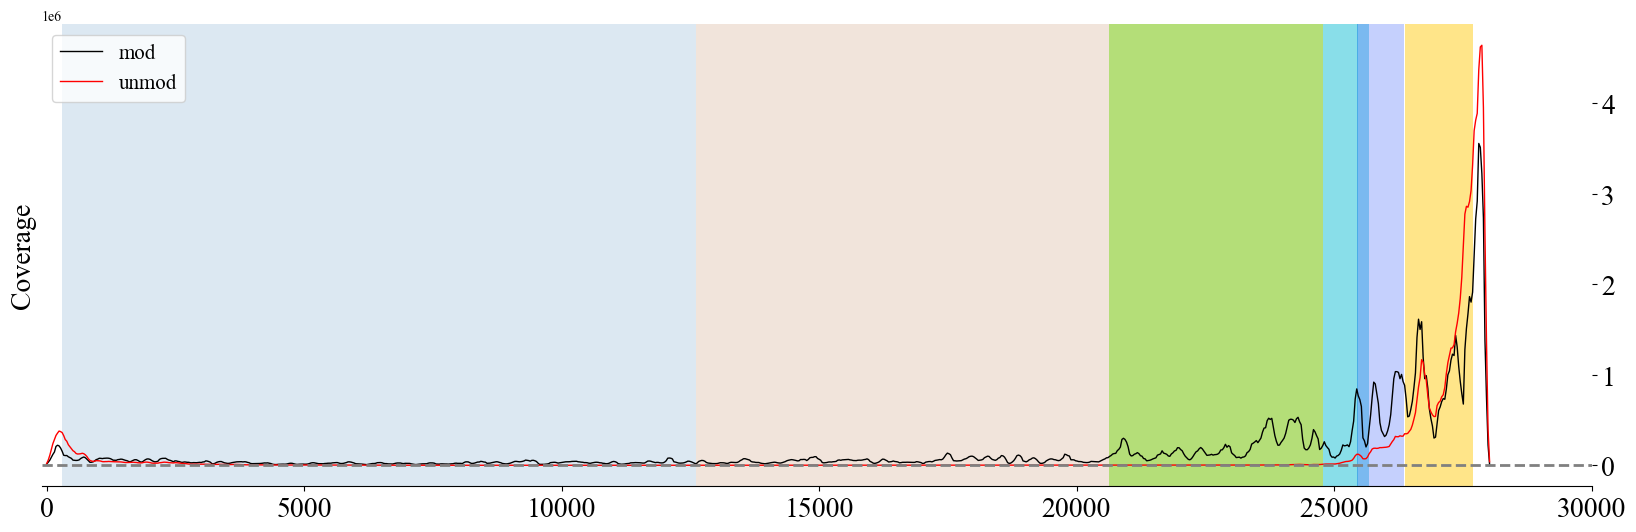

In [15]:
def plot_hist(ax, data1,data2, title):
    data1 = data1.copy()
    data2 = data2.copy()
    data1['binpos'] = np.floor(data1['pos'] / STRIDESIZE).astype(int) * STRIDESIZE
    data2['binpos'] = np.floor(data2['pos'] / STRIDESIZE).astype(int) * STRIDESIZE
    medcov1 = data1.groupby('binpos').agg({'count': 'median'})
    medcov2 = data2.groupby('binpos').agg({'count': 'median'})

    ax.plot(medcov1.index, medcov1['count'].tolist(), c='black', lw=1, label='mod')
    ax.plot(medcov2.index, medcov2['count'].tolist(), c='red', lw=1, label='unmod')
    ax.set_xlim(-100, 30000)
    ax.set_ylabel(title,fontsize=20)
    ax.legend(fontsize=15)

    for _, row in cdsanno.iterrows():
        ax.axvspan(row['start'], row['end'], fc=row['color'], alpha=.6, zorder=1)
    for spside in 'top left right'.split():#图的上、左、右边框设置为不可见
        plt.setp(ax.spines[spside], visible=False)

    ax.grid(False)#行网格线
    # plt.setp(ax.get_xgridlines(), visible=True)#列网格线
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.axhline(y=5000, color='gray', linestyle='--', linewidth=2)#添加参考线


fig, axes = plt.subplots(1, 1, figsize=(20, 6))
plot_hist(axes, merged_mod,merged_unmod, 'Coverage')

plt.savefig('D:/360MoveData/Users/dgwei/Desktop/BASIC/two-dimensional data analysis/PEDV/incell/PEDV-incell-coverage.png')

xml2ct修改版(二列数据转为四列)，处理分析shapemap数据。

In [ ]:
#第一步输入参考基因组序列
genome_dict={}
index=0
with open("reference/MK584552.1.fasta", 'r') as F:
    for line in F:
        if line.startswith(">"):
            pass
        else:
            for ll in line.rstrip():
                key=index
                index+=1
                genome_dict[index]=ll.rstrip()

In [ ]:
#第二步输入突变率,计算标准差
mutrate1=pd.read_csv('D:/360MoveData/Users/dgwei/Desktop/BASIC/two-dimensional data analysis/PEDV/refold/rf_rctools/PEDV-refold-mod-1.txt', sep='\t', names=['chrom', 'mutcount', 'coverage'],skiprows=1)
mutrate2=pd.read_csv('D:/360MoveData/Users/dgwei/Desktop/BASIC/two-dimensional data analysis/PEDV/refold/rf_rctools/PEDV-refold-mod-2.txt', sep='\t', names=['chrom', 'mutcount', 'coverage'],skiprows=1)
mutrate3=pd.read_csv('D:/360MoveData/Users/dgwei/Desktop/BASIC/two-dimensional data analysis/PEDV/refold/rf_rctools/PEDV-refold-unmod-1.txt', sep='\t', names=['chrom', 'mutcount', 'coverage'],skiprows=1)
mutrate4=pd.read_csv('D:/360MoveData/Users/dgwei/Desktop/BASIC/two-dimensional data analysis/PEDV/refold/rf_rctools/PEDV-refold-unmod-2.txt', sep='\t', names=['chrom', 'mutcount', 'coverage'],skiprows=1)

In [ ]:
def calculate_std_error(mod,unmod):
    modstderr = np.sqrt(mod['mutcount']/mod['coverage']) / np.sqrt(mod['coverage'])
    unmodstderr = np.sqrt(unmod['mutcount']/unmod['coverage']) / np.sqrt(unmod['coverage'])
    stderr=np.sqrt(modstderr**2+unmodstderr**2)
    return stderr

In [ ]:
final_stderr1=calculate_std_error(mutrate1,mutrate3)
final_stderr2=calculate_std_error(mutrate2,mutrate4)
final_stderr=(final_stderr1+final_stderr2)/2

In [ ]:
#第三步输入xml文件，组合成map格式
import xml.etree.ElementTree as ET
count=0;shapevalue=[]

In [ ]:
with open("D:/360MoveData/Users/dgwei/Desktop/BASIC/two-dimensional data analysis/PEDV/refold/result/PEDV-refold.map", 'w') as f:
    tree = ET.parse('D:/360MoveData/Users/dgwei/Desktop/BASIC/two-dimensional data analysis/PEDV/refold/rf_norm/MK584552.1.xml')
    root = tree.getroot()
    for line in root:
        a=root[0][0].text
        b=root[0][1].text
        shapevalue=[-999 if i.strip()=='NaN' else i.strip() for i in b.split(",") ]
    for (i),(key,value),(std) in zip( shapevalue,genome_dict.items(),final_stderr):
        if i==-999:
            std=0
        f.write(str(key)+"\t"+str(i)+"\t"+str(std)+'\t'+str(value)+'\n')

找出基因组中well-folded区域

In [ ]:
##设置窗口在基因组上滑动
win_size=50;step_size=1

In [ ]:
#生成窗口文件
with open("reference/MK584552.1.win50.txt","w")as f:
    with open("reference/MK584552.1.chrom.sizes","r")as F:
        for line in F:
            line=line.rstrip()
            ele=line.split("\t")
            stt=1
            while(stt+win_size <= int(ele[1])):#得到所有窗口
                end=stt+win_size
                print(ele[0]+"\t"+str(stt)+"\t"+str(end))
                f.write(ele[0]+"\t"+str(stt)+"\t"+str(end)+'\n')
                stt=stt+step_size

In [ ]:
#均一化shape值
import numpy as np
val=[];spl_val=[]
with open("D:/360MoveData/Users/dgwei/Desktop/BASIC/two-dimensional data analysis/PEDV/refold/result/PEDV-refold.map","r")as F:
    for line in F:
        val.append(float(line.split('\t')[1].rstrip()))
    val=[0 if i==-999 else i for i in val]
    val_array=np.array(val)
    val_median_shape=np.median(val_array)
val_median_shape

In [ ]:
with open("D:/360MoveData/Users/dgwei/Desktop/BASIC/two-dimensional data analysis/PEDV/refold/result/PEDV-refold.shapenorm.txt","w")as ff:
    with open("reference/MK584552.1.win50.txt", "r") as f:
        for l in f:
            spl_val.append(str(np.median(val_array[int(l.split('\t')[1])-1:int(l.split('\t')[2])])-val_median))
        ff.write(str('\n'.join(spl_val)))

In [ ]:
#均一化shannon值
import pandas as pd
# 读取CSV文件
df_shannon = pd.read_csv("D:/360MoveData/Users/dgwei/Desktop/BASIC/two-dimensional data analysis/PEDV/refold/rf_fold/shannon/MK584552.1.wig", header=None, sep=" ", dtype=str,skiprows=2,names=['V1','value'])
# 创建新的数据框df_shannon_new
df_shannon_new = pd.DataFrame({'V1': range(1, 28045)})
# 合并数据框
df_shannon_newest = pd.merge(df_shannon, df_shannon_new, left_index=True, right_index=True, how='outer')
# # 将缺失值替换为0
df_shannon_newest.fillna(0, inplace=True)
# # 将V2列转换为数字类型
df_shannon_newest['value'] = pd.to_numeric(df_shannon_newest['value'])
# # 打印结果
df_shannon_newest=df_shannon_newest[['V1_y','value']]

In [ ]:
import numpy as np
val=[];spl_val=[]
val_array=np.array(df_shannon_newest['value'])
val_median_shannon=np.median(val_array)
val_median_shannon

In [ ]:
with open("D:/360MoveData/Users/dgwei/Desktop/BASIC/two-dimensional data analysis/PEDV/refold/result/PEDV-refold.shannonnorm.txt","w")as ff:
    with open("reference/MK584552.1.win50.txt", "r") as f:
        for l in f:
            spl_val.append(str(np.median(val_array[int(l.split('\t')[1])-1:int(l.split('\t')[2])])))
        ff.write(str('\n'.join(spl_val)))

In [ ]:
#找出winReact和winShannon中都小于globa median的位点
pos=0;a=[];s=[]
with open("D:/360MoveData/Users/dgwei/Desktop/BASIC/two-dimensional data analysis/PEDV/refold/result/MK584552.1.wellfolded.txt",'w') as ff:
    with open("D:/360MoveData/Users/dgwei/Desktop/BASIC/two-dimensional data analysis/PEDV/refold/result/PEDV-refold.shapenorm.txt",'r')as F,open("D:/360MoveData/Users/dgwei/Desktop/BASIC/two-dimensional data analysis/PEDV/refold/result/PEDV-refold.shannonnorm.txt",'r') as f:
        for line1 in F:
            line2=f.readline()
            pos+=1
            if float(line1) < val_median_shape and float(line2) < val_median_shannon:
                a.append(pos)
        for i in sorted(set(a)):
            if len(s) == 0 or s[-1] + 1 == i:
                s.append(i)  # 入栈
            else:
                if len(s) >= 2:
                    print(s)
                    ff.write(str(s[0]+25) + '\t' + str(s[-1]+25) + "\n")
                s = []  # 清空
                s.append(i)  # 入栈
        # 最后一轮，需判断下
        if len(s) >= 2:
            print(s)

##一维弧形图和二维交互图展示交互矩阵

In [ ]:
def plot_tri_matrix2(matrix, ct_in, title, s, e, r, interp, cmap):
    '''
    plot a compartment and heatmap mix fig
    '''
    ##ax size
    S = int(s / r)
    E = int(e / r)
    matrix = matrix.copy()
    matrix[np.isnan(matrix)] = 0
    matrix = np.log2(matrix + 1)
    H = int((E - S)/2)
    left, width = 0.1, 0.75
    ratio = 0.5
    bottom, height = 1 -  0.75 * ratio , 0.75 * ratio
    size_stem = [left, bottom - 0.1, width, height]
    stept_h = height
    bottom_h = bottom - stept_h - 0.04
    size_heatmap = [left, bottom_h - 0.1, width, stept_h]
    size_colorbar = [left + width - 0.1, bottom_h- 0.05, width/40, height/2]
    fig = plt.figure(figsize=(12 * ratio * 2**0.5 , 12))

    ##ct
    ct = ct_in[s:e]
    mask_ct = (ct['5'] < (e-1)) & (ct['5'] > s)
    ct = ct[mask_ct]
    start = s
    col_ric = (ct['1']- start - 1) / r
    raw_ric = (ct['5'] - start - 1) / r

    ##heatmap
    ax = fig.add_axes(size_heatmap)
    shp = matrix.shape
    ma = np.zeros_like(matrix) * np.nan
    ma[S:E,S:E] = matrix[S:E,S:E]
    tri_ma = np.zeros([H, E-S]) * np.nan
    x,y = np.diag_indices_from(matrix)
    for i in np.arange(H):
        if (S - i) >= 0 and (E + i) <= shp[0]:
            tri_ma[H-i-1] = ma[x[S+i:E+i],y[S-i:E-i]]

        elif (S - i) < 0:
            step = i - S
            tri_ma[H-i-1][step:] = ma[x[S+i+step:E+i],y[S-i+step:E-i]]

        elif (E + i) > shp[0]:
            step = shp[0] - (E+i)
            tri_ma[H-i-1][:step] = ma[x[S+i:E+i+ step],y[S-i:E-i + step]]

    nonzero = matrix[S:E,S:E][np.nonzero(matrix[S:E,S:E])]
    vmax = np.percentile(nonzero,85)

    ##scatter stem loop
    sc = ax.imshow(tri_ma[::-1], vmax = vmax, vmin = 0, aspect = 'auto'
                   , interpolation = interp, cmap = plt.get_cmap(cmap))
    plt.scatter((raw_ric+col_ric)/2, (col_ric-raw_ric) /2 , s = 50, marker = 'v',
                color = 'none', edgecolors ='red', alpha=0.25)
    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    plt.ylim(H,0)
    plt.xlim([0,E-S])
    plt.xticks(np.arange(0, E-S + 1, r * 10), np.arange(S, E+1, r*10) * r)
    plt.yticks([])
    ax.spines[['right', 'left', 'bottom']].set_visible(False)

    ax = fig.add_axes(size_colorbar)
    fig.colorbar(sc,cax = ax)

    ##line stem loop

    ax = fig.add_axes(size_stem)

    for seq in zip(raw_ric, col_ric):
        s = seq[0]
        e = seq[1]
        radius = (e - s) / 2
        a,b = ((s+e)/2, 0)
        x = np.arange(a - radius, a + radius + 1, 0.01 )
        y = b + np.sqrt(radius ** 2 - (x - a) ** 2)
        plt.plot(x , y, lw = 0.15, color = 'grey')
        plt.plot(x , -y, lw = 0.15, color = 'grey')
    ax.spines[['top', 'right', 'left']].set_visible(False)
    plt.xlim([0,E-S])
    plt.ylim([0,H])
    ax.tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
    #plt.xticks(np.arange(0, E-S + 1, r * 10), np.arange(S, E+1, r*10) * r)
    plt.xticks(np.arange(0, E-S + 1, r * 10), (' '*np.arange(S, E+1, r*10).shape[0]).split(' ')[:-1])
    # plt.xticks([])
    plt.yticks([])
    ax.set_title(title,fontsize=20)
    #ax.set_xlabel('Bp')
    return

In [ ]:
cmap_list = ['afmhot','viridis', 'cividis', 'RdYlGn', 'pink_r']
interpolation_list = ['antialiased', 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos', 'blackman']

In [ ]:
import numpy as np
import pandas as pd
from ric_fun import extract_matrix
# matrix1="D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/27_in_Virion.1nt.none.matrix"
# matrix2="D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/30_in_Virion.1nt.none.matrix"
# ct="D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/pdcov_in_Virion.hic"
res=5
file_dir="D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/"
ma_PDCoV_rna_virion1, oe_PDCoV_rna_virion1, dis_PDCoV_rna_virion1 = extract_matrix(file_dir, '27_in_Virion.5nt.none.matrix', res)
ma_PDCoV_rna_virion2, oe_PDCoV_rna_virion2, dis_PDCoV_rna_virion2 = extract_matrix(file_dir, '30_in_Virion.5nt.none.matrix', res)
strc_ric_PDCoV_virion = np.loadtxt( file_dir + 'virus.phase4_final.whole.ct', usecols=[0,1,2,3,4,5], dtype=[('1','<i4'),('2','<U2'),('3','<i4'),('4','<i4'),('5','<i4'), ('6','<i4')], skiprows=1)

In [ ]:
# plot_tri_matrix2(ma_sars_com_cell, strc_ric_sars2_virion, 'SARS-CoV2:27250-29500Bp', 27250, 29500, 5, 'nearest', 'viridis')

##距离衰减曲线

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ric_fun import extract_matrix
from ric_fun import get_oe, get_matrix_npz
from scipy.stats.mstats import zscore
# matrix1 = pd.read_csv('D:/360MoveData/Users/dgwei/Desktop/工作/Vis_of_Covdata/PDCoV_in_Virion.none.1bp.matrix', names=['S', 'E', 'value'], sep='\t')
# matrix1 = pd.read_csv('D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/27_in_Virion.5nt.none.matrix', names=['S', 'E', 'value'], sep='\t')
matrix1 = pd.read_csv('D:/360MoveData/Users/dgwei/Desktop/BASIC/three-dimensional data analysis/PEDV_in_Virion.5nt.raw.matrix', names=['S', 'E', 'value'], sep='\t')
# matrix2 = pd.read_csv('D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/30_in_Virion.5nt.none.matrix', names=['S', 'E', 'value'], sep='\t')
# max(matrix1['E']-matrix1['S'])


In [100]:
matrix1['dis']=matrix1['E']-matrix1['S']
# line=matrix1[(matrix1['S']>=65) &(matrix1['S']<=75) & (matrix1['E']>=23975) &(matrix1['E']<=23985)]

In [101]:
new_matrix=matrix1.iloc[:,-2:]

In [102]:
merge_matrix=new_matrix.groupby('dis').sum().reset_index()

In [26]:
# import numpy as np
# from scipy.stats import zscore
# zscore_data=zscore(merge_matrix['value'])
# normalized_data = (zscore_data - zscore_data.min()) / (zscore_data.max() - zscore_data.min())
# df=pd.DataFrame(normalized_data)
# df['dis']
# normalized_data.to_csv('D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/chimeric_coverage.txt', sep='\n', index=False)

In [103]:
merge_matrix['value'] = merge_matrix['value'].apply(lambda x: (x / 1000))

In [109]:
value_array = merge_matrix['value'].values
value_array

array([3.931575e+03, 3.199081e+03, 1.013478e+03, ..., 4.000000e-03,
       1.000000e-03, 1.000000e-03])

In [ ]:
# res=5
# file_dir="D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/"
# ma_PDCoV_rna_virion1, oe_PDCoV_rna_virion1, dis_PDCoV_rna_virion1 = extract_matrix(file_dir, '27_in_Virion.5nt.none.matrix', res)
# ma_PDCoV_rna_virion2, oe_PDCoV_rna_virion2, dis_PDCoV_rna_virion2 = extract_matrix(file_dir, '30_in_Virion.5nt.none.matrix', res)
# dis_PDCoV_rna_virion1

In [105]:
# 使用brokenaxes函数创建绘图坐标轴体系，ylim参数中输入断点两侧轴范围，
# despine参数控制是否显示上轴和右轴，hspace参数控制断点截断线之间的宽度，d控制断点截断线的长度
from brokenaxes import brokenaxes

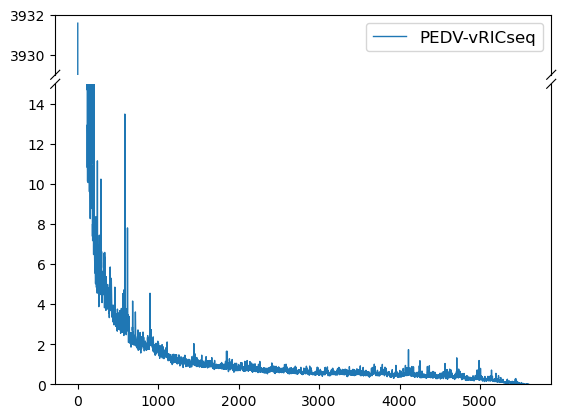

In [110]:
fig=plt.figure()
ax = brokenaxes(ylims=((0,15),(3929,3932)),despine=False, hspace=0.05,d=0.01)
ax.grid(False)
ax.plot(value_array[0:5610], label = 'PEDV-vRICseq',linewidth=1)
# plt.plot(dis_SARS2_wdh_vero24h_rep2[50:3000], label = 'PDCoV-rep2',linewidth=1)
ax.set_xticks(np.arange(0,5610,1000),fontsize=15)
# ax.set_yticks(fontsize=15)
ax.legend(loc='upper right',fontsize="large")
# ax.legend(loc='upper right',fontsize="xx-large")
# plt.savefig('D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/PDCoV-rep2.distance.png', dpi=1200)
plt.show()

统计嵌合reads覆盖度和100nt腺嘌呤和尿嘧啶含量

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ric_fun import extract_matrix
from ric_fun import get_oe, get_matrix_npz
from scipy.stats.mstats import zscore
matrix1 = pd.read_csv('D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/27_in_Virion.1nt.none.matrix', names=['S', 'E', 'value'], sep='\t')
# matrix2 = pd.read_csv('D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/30_in_Virion.5nt.none.matrix', names=['S', 'E', 'value'], sep='\t')

In [267]:
start_matrix=matrix1.iloc[:,[0,2]]
end_matrix=matrix1.iloc[:,[1,2]]

In [268]:
startpos_matrix=start_matrix.groupby('S').sum().reset_index()
startpos_matrix=startpos_matrix.rename(columns={'S':'pos'})

In [269]:
endpos_matrix=end_matrix.groupby('E').sum().reset_index()
endpos_matrix=endpos_matrix.rename(columns={'E':'pos'})

In [270]:
allpos_matrix=pd.concat([startpos_matrix,endpos_matrix]).groupby('pos').sum().reset_index().sort_values(by='pos')

In [271]:
allpos_matrix_new = pd.DataFrame({'pos': range(1, 25421),'value':0})
allpos_matrix_newest = pd.concat([allpos_matrix,allpos_matrix_new]).groupby('pos').sum().reset_index().sort_values(by='pos')
allpos_matrix_newest

,pos,value
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
25415,25416,1.0
25416,25417,1.0
25417,25418,3.0
25418,25419,4.0


In [272]:
allpos_matrix_newest.to_csv('D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/chimeric_coverage2.txt', sep='\t', index=False)

In [273]:
# 计算每100行的均值
allpos_matrix_newest['mean'] = allpos_matrix_newest['value'].rolling(window=100, min_periods=1).mean()
allpos_matrix_newest=allpos_matrix_newest[:-20]
allpos_matrix_newest

,pos,value,mean
0,1,0.0,0.00
1,2,0.0,0.00
2,3,0.0,0.00
3,4,0.0,0.00
4,5,0.0,0.00
...,...,...,...
25395,25396,61.0,1383.29
25396,25397,41.0,1364.14
25397,25398,23.0,1347.60
25398,25399,22.0,1327.88


In [274]:
# # # 提取每100行的起始位置和结束位置
start = range(0, len(allpos_matrix_newest), 100)
end = range(100, len(allpos_matrix_newest) + 1, 100)

In [275]:
# # # 创建新的DataFrame存储结果
result = pd.DataFrame({'start': start, 'end': end, 'meanvalue': allpos_matrix_newest['mean'][99::100].round(0)})
result

,start,end,meanvalue
99,0,100,259.0
199,100,200,620.0
299,200,300,277.0
399,300,400,176.0
499,400,500,171.0
...,...,...,...
24999,24900,25000,227.0
25099,25000,25100,251.0
25199,25100,25200,347.0
25299,25200,25300,782.0


In [276]:
import numpy as np
from scipy.stats import zscore
zscore_data=zscore(result['meanvalue'])
normalized_data = (zscore_data - zscore_data.min()) / (zscore_data.max() - zscore_data.min())
df=pd.DataFrame(normalized_data)
df['start']=result['start'];df['end']=result['end']
df['meanvalue']=df['meanvalue'].round(2)

In [277]:
df.to_csv('D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/chimeric_coverage2.roll100.txt', sep='\t', index=False)

In [25]:
# 读取基因组序列文件
with open('D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/KT336560.1.fasta', 'r') as file:
    next(file)
    genome_sequence = file.read().replace('\n', '')

In [26]:
# 定义每个片段的长度
segment_length = 50

In [27]:
# 统计每个片段中 A 和 U（或 T）的含量
with open('D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/au_content1.txt', 'w') as file:
    for i in range(0, len(genome_sequence), segment_length):
        segment = genome_sequence[i:i+segment_length]
        a_count = segment.count('A')
        u_count = segment.count('U') or segment.count('T')  # U 或 T 的数量
        total_count = len(segment)
        a_percentage = round((a_count / total_count)*100,0)
        u_percentage = round((u_count / total_count)*100,0)
        au_percentage=(a_percentage+u_percentage)/100
        file.write(str(au_percentage)+"\n")

1271.0